In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# --- 1. Input your data ---
df = pd.read_csv('salary_offer.csv')

df


,Lead,Salary (k),Free coffee,Home office,Offer score,Note
0,1,10,No,No,8,Lead = [1 or 10]
1,10,1,Yes,Yes,2,"Salary = [1k, 5k, or 10k]"
2,1,1,Yes,Yes,7,Free coffee = [Yes or No]
3,10,10,Yes,Yes,9,Home office = [Yes or No]
4,10,10,No,No,7,NaN
5,1,1,No,No,3,NaN
6,10,5,Yes,Yes,6,NaN
7,1,5,No,Yes,7,NaN
8,1,5,Yes,No,5,NaN


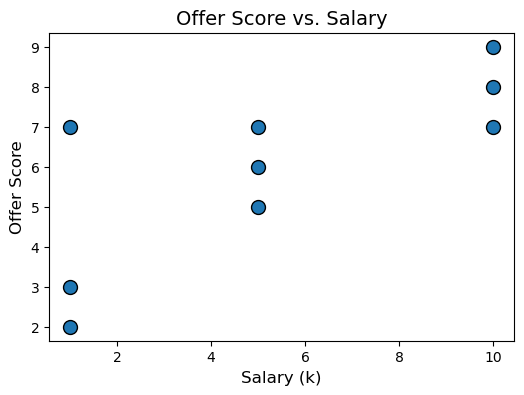

In [7]:
# --- 2. Scatter plot: Salary vs. Offer score ---
plt.figure(figsize=(6, 4))
plt.scatter(df['Salary (k)'], df['Offer score'], s=100, edgecolor='k')
plt.title('Offer Score vs. Salary', fontsize=14)
plt.xlabel('Salary (k)', fontsize=12)
plt.ylabel('Offer Score', fontsize=12)
plt.show()



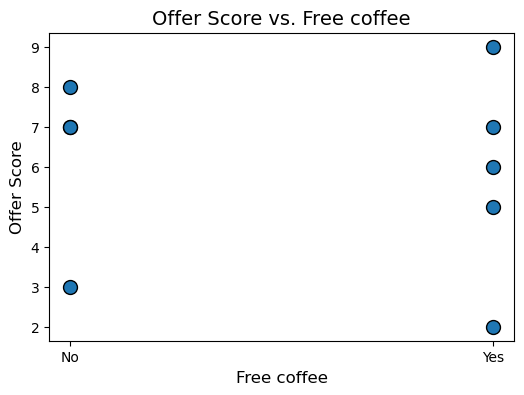

In [8]:
# --- 3. Scatter plot: Free coffee vs. Offer score ---
plt.figure(figsize=(6, 4))
plt.scatter(df['Free coffee'], df['Offer score'], s=100, edgecolor='k')
plt.title('Offer Score vs. Free coffee', fontsize=14)
plt.xlabel('Free coffee', fontsize=12)
plt.ylabel('Offer Score', fontsize=12)
plt.show()

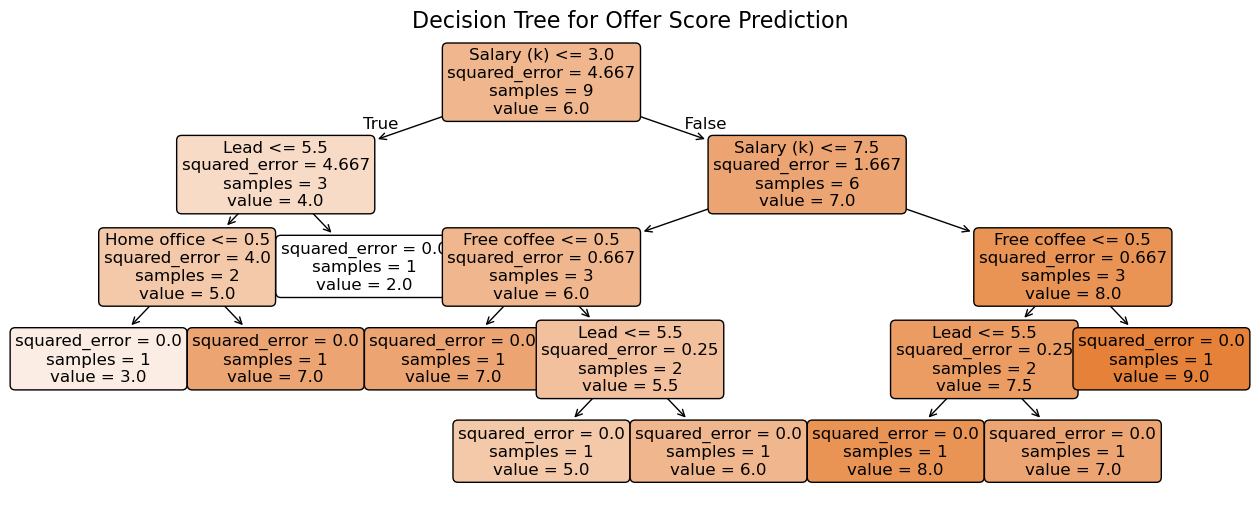

In [13]:
# --- 4. Train Decision Tree ---
# Encode categorical columns
le = LabelEncoder()
df['Free_coffee_enc'] = le.fit_transform(df['Free coffee'])
df['Home_office_enc'] = le.fit_transform(df['Home office'])

X = df[['Salary (k)', 'Lead', 'Free_coffee_enc', 'Home_office_enc']]
y = df['Offer score']

# --- Train Decision Tree ---
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X, y)

# --- 5. Plot the Decision Tree ---
plt.figure(figsize=(16, 6))
plot_tree(
    tree,
    feature_names=['Salary (k)', 'Lead', 'Free coffee', 'Home office'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Decision Tree for Offer Score Prediction', fontsize=16)
plt.show()

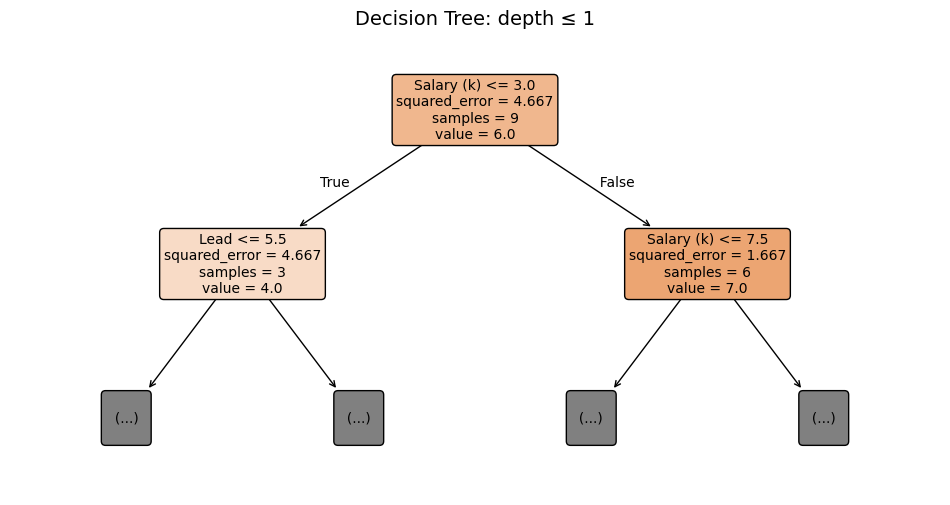

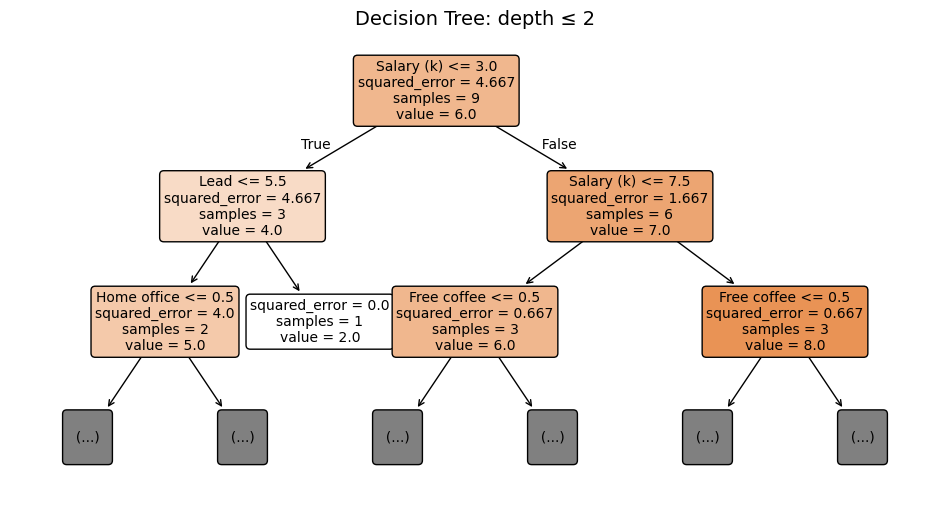

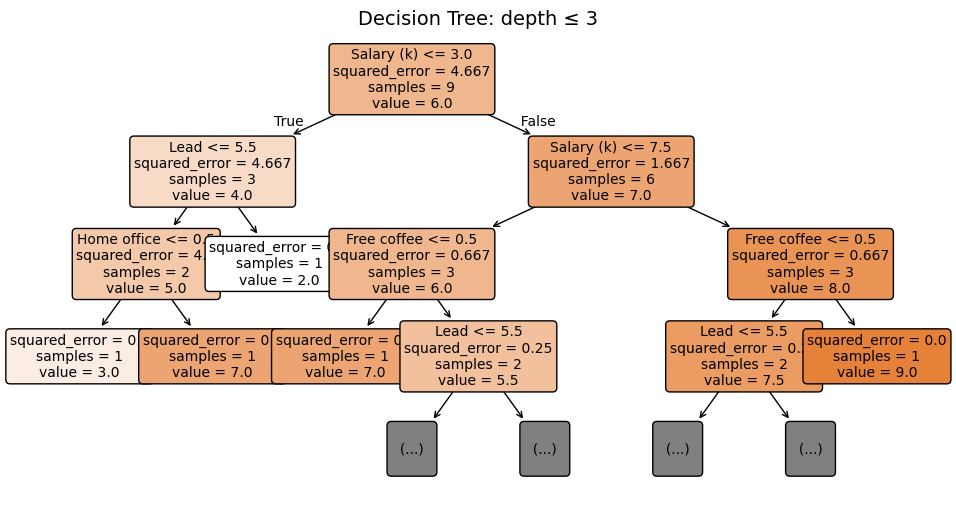

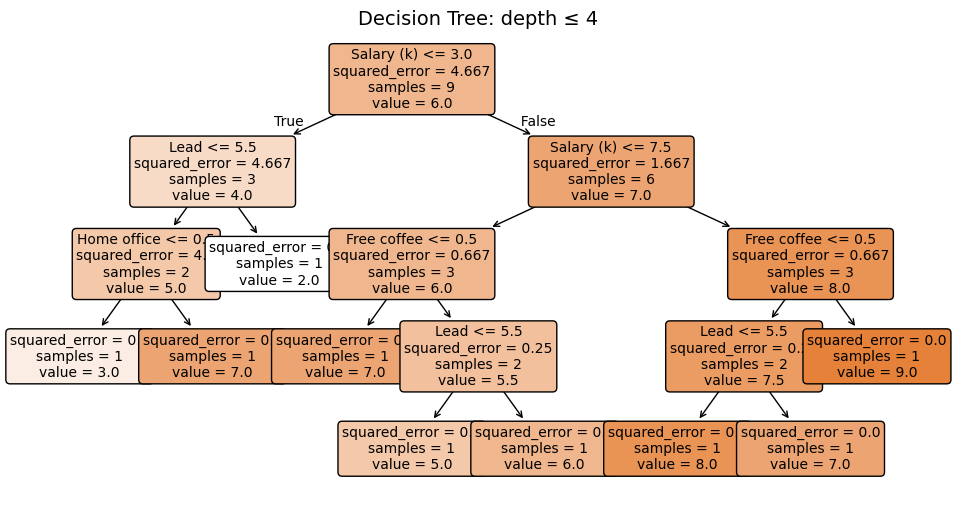

In [14]:
from sklearn.tree import plot_tree

max_depth = tree.get_depth()
feature_names = ['Salary (k)', 'Lead', 'Free coffee', 'Home office']

for depth in range(1, max_depth + 1):
    plt.figure(figsize=(12, 6))
    plot_tree(
        tree,
        feature_names=feature_names,
        filled=True,
        rounded=True,
        fontsize=10,
        max_depth=depth
    )
    plt.title(f'Decision Tree: depth ≤ {depth}', fontsize=14)
    plt.show()